In [ ]:
!pip install tensorflow==2.14.1
!pip install tensorflow-estimator==2.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
!pip install tensorflow-privacy

  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl.metadata (1.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.24.0
    Uninstalling tensorflow-probability-0.24.0:
      Successfully uninstalled tensorflow-probability-0.24.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packag

In [ ]:
import os
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample, shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from sklearn.metrics import (
    recall_score,
    f1_score,
    precision_score,
    accuracy_score,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
     auc,
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalsePositives, FalseNegatives

import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import BatchNormalization



#Filtering errors
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data  = pd.read_csv("/content/gdrive/My Drive/data.csv")

In [ ]:
data.head(2)

,timestamp,src_ip,dst_ip,protocol,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,...,tcp_flag_ns,tcp_flag_cwr,tcp_flag_ecn,tcp_flag_urg,tcp_flag_ack,tcp_flag_push,tcp_flag_reset,tcp_flag_syn,tcp_flag_fin,is_attack
0,"02/14/2020, 11:01:47:599181",1,18,12,26,118,1,0,0,14816,...,0,0,0,0,2,2,0,0,2,0
1,"02/14/2020, 10:53:58:393457",5,18,12,26,118,1,0,0,27432,...,0,0,0,0,2,2,0,0,2,0


In [ ]:
data.isna().sum()

,0
timestamp,0
src_ip,0
dst_ip,0
protocol,0
ttl,0
ip_len,0
ip_flag_df,0
ip_flag_mf,0
ip_flag_rb,0
src_port,0


In [ ]:
data.columns

Index(['timestamp', 'src_ip', 'dst_ip', 'protocol', 'ttl', 'ip_len',
       'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port',
       'tcp_flag_res', 'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn',
       'tcp_flag_urg', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset',
       'tcp_flag_syn', 'tcp_flag_fin', 'is_attack'],
      dtype='object')

In [ ]:
try:
    data = data.drop('timestamp', axis=1)
except KeyError:
    pass

In [ ]:
data.columns

Index(['src_ip', 'dst_ip', 'protocol', 'ttl', 'ip_len', 'ip_flag_df',
       'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port', 'tcp_flag_res',
       'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn', 'tcp_flag_urg',
       'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn',
       'tcp_flag_fin', 'is_attack'],
      dtype='object')

In [ ]:
target_column = 'is_attack'
categorical_columns = [col for col in data.columns if col not in [target_column]]

In [ ]:
X = data.drop(target_column, axis=1)
y = data[target_column]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)



# Standard Scaling
scaler = StandardScaler()

#Perfom feature scaling for the training set
X_train_scaled = X_train.copy()
X_train_scaled[categorical_columns] = scaler.fit_transform(X_train[categorical_columns])

#Perfom feature scaling for the training set
X_valid_scaled = X_valid.copy()
X_valid_scaled[categorical_columns] = scaler.transform(X_valid[categorical_columns])

#Perfom feature scaling for the test set
X_test_scaled = X_test.copy()
X_test_scaled[categorical_columns] = scaler.transform(X_test[categorical_columns])

# Reshape data for LSTM

#I now convert the scaled training set into a NP Arrays and then reshape it

#I reshaped it to be compatible with the expected inputs by LSTM model
X_train_numpy = X_train_scaled[categorical_columns].to_numpy()
X_train_lstm = X_train_numpy.reshape(X_train_numpy.shape[0], 1, X_train_numpy.shape[1])

## PATE Base Model

In [ ]:
num_classes = data[target_column].nunique()
# mlp_model = Sequential()
# Define teacher model architecture
def create_teacher_model(input_shape, num_classes):
    model = Sequential([
        Dense(288, activation="relu", input_shape=input_shape),
        Dropout(0.2),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(num_classes, activation="softmax")
    ])
    return model

# Define student model architecture
def create_student_model(input_shape, num_classes):
    model = Sequential([
        Dense(288, activation="relu", input_shape=input_shape),
        Dropout(0.2),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(num_classes, activation="softmax")
    ])
    return model
# # Add the first dense layer with dropout
# mlp_model.add(Dense(32, activation='relu', input_shape=(len(categorical_columns),)))
# mlp_model.add(Dropout(0.5))

# # Add the second dense layer with dropout
# mlp_model.add(Dense(32, activation='relu'))
# mlp_model.add(Dropout(0.5))

# Define hyperparameters
num_teachers = 1
input_shape = (len(categorical_columns),)
epsilon = 1.0
kfolds = 2
epoch_num = 2

# Perform 5-fold cross-validation
kfold = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=42)  # Set random_state for reproducibility
cv_results = []

for train_index, test_index in kfold.split(X_train_scaled[categorical_columns], y_train):
    X_train_fold, X_val_fold = X_train_scaled[categorical_columns].iloc[train_index], X_train_scaled[categorical_columns].iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create and train teacher models for this fold
    teacher_models = []
    for i in range(num_teachers):
        teacher_model = create_teacher_model(input_shape, num_classes)
        teacher_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
        teacher_model.fit(X_train_fold, y_train_fold, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed
        teacher_models.append(teacher_model)

    # Generate labels for the training data using teacher models
    def generate_labels(data):
        labels = []
        for model in teacher_models:
            labels.append(np.argmax(model.predict(data), axis = 1))
        return labels

    # Define your student model
    student_model = create_student_model(input_shape, num_classes)
    student_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

    # Generate labels for the training data using teacher models
    train_labels = generate_labels(X_train_fold)
    student_y_train_fold = pd.Series(train_labels[0], index = y_train_fold.index)

    # Train the student model using the labels generated by the teacher models
    student_model.fit(X_train_fold, student_y_train_fold, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed

    # Evaluate the student model on the validation set
    val_loss, val_accuracy = student_model.evaluate(X_val_fold, y_val_fold)
    cv_results.append((val_loss, val_accuracy))

# Fit the full model on the entire training set
teacher_models = []
for i in range(num_teachers):
    teacher_model = create_teacher_model(input_shape, num_classes)
    teacher_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    teacher_model.fit(X_train_scaled[categorical_columns], y_train, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed
    teacher_models.append(teacher_model)

# Generate labels for the training data using teacher models
def generate_labels(data):
    labels = []
    for model in teacher_models:
        labels.append(np.argmax(model.predict(data), axis = 1))
    return labels

# Define your student model
student_model = create_student_model(input_shape, num_classes)
student_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Generate labels for the training data using teacher models
train_labels = generate_labels(X_train_scaled[categorical_columns])
student_train_labels = pd.Series(train_labels[0], index = X_train_scaled.index)

# Train the student model using the labels generated by the teacher models
model_history =  student_model.fit(X_train_scaled[categorical_columns], student_train_labels, epochs=epoch_num, batch_size=32, validation_split = 0.2)  # Adjust epochs and batch_size as needed

# Evaluate the student model on the test set
test_loss, test_accuracy = student_model.evaluate(X_test_scaled[categorical_columns], y_test)

# Predict on the test data
y_test_pred_mlp = student_model.predict(X_test_scaled[categorical_columns])

# Convert probability predictions to class labels
y_test_pred_classes_mlp = np.argmax(y_test_pred_mlp, axis=1)

Epoch 1/2
24131/24131 [==============================] - 144s 6ms/step - loss: 0.0047 - accuracy: 0.9990
Epoch 2/2
24131/24131 [==============================] - 57s 2ms/step
Epoch 1/2
24131/24131 [==============================] - 156s 6ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 2/2
24131/24131 [==============================] - 64s 3ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 1/2
24131/24131 [==============================] - 154s 6ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 2/2
24131/24131 [==============================] - 58s 2ms/step
Epoch 1/2
24131/24131 [==============================] - 153s 6ms/step - loss: 0.0037 - accuracy: 0.9992
Epoch 2/2
24131/24131 [==============================] - 62s 3ms/step - loss: 0.0120 - accuracy: 0.9999
Epoch 1/2
48262/48262 [==============================] - 304s 6ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 2/2
48262/48262 [==============================] - 111s 2ms/step
Epoch 1/2
38610/38610 [==============================] -

In [ ]:
# Print the average cross-validation results
print("Average cross-validation loss:", sum(cv_result[0] for cv_result in cv_results) / len(cv_results))
print("Average cross-validation accuracy:", sum(cv_result[1] for cv_result in cv_results) / len(cv_results))

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_test_pred_classes_mlp)
precision_mlp = precision_score(y_test, y_test_pred_classes_mlp, average='macro')
recall_mlp = recall_score(y_test, y_test_pred_classes_mlp, average='macro')
f1_mlp = f1_score(y_test, y_test_pred_classes_mlp, average='macro')

# Print the results for the MLP model
print("MLP Model:")
print(f"Accuracy =  {accuracy_mlp}")
print(f"Precision = {precision_mlp}")
print(f"Recall = {recall_mlp}")
print(f"F1 Score =  {f1_mlp}")

Average cross-validation loss: 0.011348331347107887
Average cross-validation accuracy: 0.9999527335166931
MLP Model:
Accuracy =  0.9985673839459588
Precision = 0.9985259139333613
Recall = 0.9986104569006123
F1 Score =  0.998566130589849


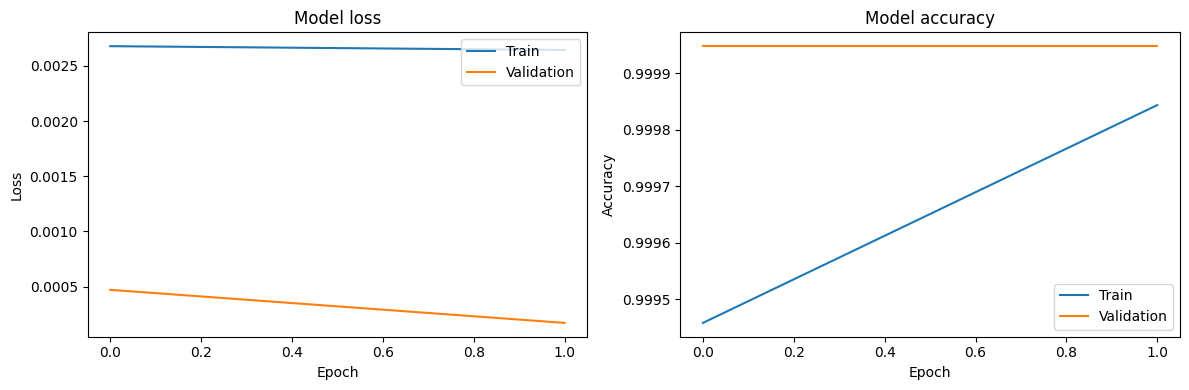

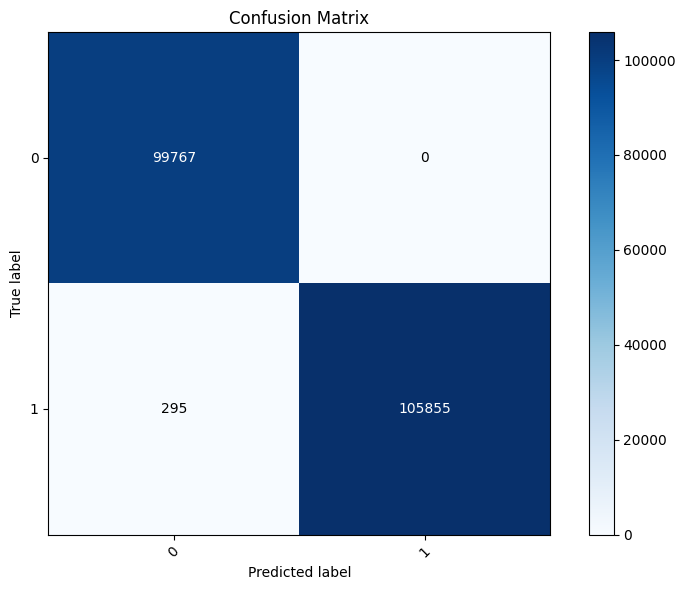

In [ ]:
# Function to plot loss curves
def plot_loss(history1, history2=None):
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss values for the first model
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values for the first model
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    if history2 is not None:
        # Plot training & validation loss values for the second model
        plt.subplot(1, 2, 1)
        plt.plot(history2.history['loss'], linestyle='dashed')
        plt.plot(history2.history['val_loss'], linestyle='dashed')
        plt.legend(['Train', 'Validation', 'Train Privacy', 'Validation Privacy'], loc='upper right')

        # Plot training & validation accuracy values for the second model
        plt.subplot(1, 2, 2)
        plt.plot(history2.history['accuracy'], linestyle='dashed')
        plt.plot(history2.history['val_accuracy'], linestyle='dashed')
        plt.legend(['Train', 'Validation', 'Train Privacy', 'Validation Privacy'], loc='lower right')

    plt.tight_layout()
    plt.show()

# Plot loss curves
plot_loss(model_history)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_classes_mlp)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

num_classes = conf_matrix.shape[0]

# Get class labels from the LabelEncoder
class_labels = [0, 1]

plt.xticks(np.arange(num_classes), class_labels, rotation=45)
plt.yticks(np.arange(num_classes), class_labels)

thresh = conf_matrix.max() / 2.

# Add text annotations
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Precision-Recall Curve (Not possible for Multiclass Classification, it is designed for Binary Class only)
# precision, recall, thresholds = precision_recall_curve(y_test_binary_true, y_test_pred_mlp)
# area_under_curve = auc(recall, precision)

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc='lower left')
# plt.show()

## Privacy

In [ ]:
# Define your teacher model architecture
def create_teacher_model(input_shape, num_classes):
    model = Sequential([
        Dense(288, activation="relu", input_shape=input_shape),
        Dropout(0.2),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(num_classes, activation="softmax")
    ])
    return model

# Define differential privacy parameters
batch_size = 16
l2_norm_clip = 1.0
noise_multiplier = 1.3
num_microbatches = 1

# Create a DP optimizer
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=0.003
)

# Define your student model architecture with differential privacy
def create_student_model_privacy(input_shape, num_classes):
    model = Sequential([
        Dense(288, activation="relu", input_shape=input_shape),
        Dropout(0.2),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(num_classes, activation="softmax"),
        Dense(num_classes, activation="softmax")  # Add an additional layer for differential privacy
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Define hyperparameters
num_teachers = 1
input_shape = (len(categorical_columns),)
epsilon = 1.0
kfolds = 2
epoch_num = 2

# Perform 5-fold cross-validation
kfold = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=42)  # Set random_state for reproducibility
cv_results = []

for train_index, test_index in kfold.split(X_train_scaled[categorical_columns], y_train):
    X_train_fold, X_val_fold = X_train_scaled[categorical_columns].iloc[train_index], X_train_scaled[categorical_columns].iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create and train teacher models for this fold
    teacher_models = []
    for i in range(num_teachers):
        teacher_model = create_teacher_model(input_shape, num_classes)
        teacher_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
        teacher_model.fit(X_train_fold, y_train_fold, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed
        teacher_models.append(teacher_model)

    # Generate labels for the training data using teacher models
    def generate_labels(data):
        labels = []
        for model in teacher_models:
            labels.append(np.argmax(model.predict(data), axis = 1))
        return labels

    # Define your student model
    student_model_privacy = create_student_model_privacy(input_shape, num_classes)
    student_model_privacy.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

    # Generate labels for the training data using teacher models
    train_labels = generate_labels(X_train_fold)
    student_y_train_fold = pd.Series(train_labels[0], index = y_train_fold.index)

    # Train the student model using the labels generated by the teacher models
    student_model_privacy.fit(X_train_fold, student_y_train_fold, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed

    # Evaluate the student model on the validation set
    val_loss, val_accuracy = student_model.evaluate(X_val_fold, y_val_fold)
    cv_results.append((val_loss, val_accuracy))

# Fit the full model on the entire training set
teacher_models = []
for i in range(num_teachers):
    teacher_model = create_teacher_model(input_shape, num_classes)
    teacher_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    teacher_model.fit(X_train_scaled[categorical_columns], y_train, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed
    teacher_models.append(teacher_model)

# Generate labels for the training data using teacher models
def generate_labels(data):
    labels = []
    for model in teacher_models:
        labels.append(np.argmax(model.predict(data), axis = 1))
    return labels

# Define your student model
student_model_privacy = create_student_model_privacy(input_shape, num_classes)
student_model_privacy.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Generate labels for the training data using teacher models
train_labels = generate_labels(X_train_scaled[categorical_columns])
student_train_labels = pd.Series(train_labels[0], index = X_train_scaled.index)

# Train the student model using the labels generated by the teacher models
model_history_privacy =  student_model_privacy.fit(X_train_scaled[categorical_columns], student_train_labels, epochs=epoch_num, batch_size=32, validation_split = 0.2)  # Adjust epochs and batch_size as needed

# Evaluate the student model on the test set
test_loss, test_accuracy = student_model_privacy.evaluate(X_test_scaled[categorical_columns], y_test)


Epoch 1/2
24131/24131 [==============================] - 158s 6ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 2/2
24131/24131 [==============================] - 57s 2ms/step
Epoch 1/2
24131/24131 [==============================] - 159s 7ms/step - loss: 0.0322 - accuracy: 0.9924
Epoch 2/2
24131/24131 [==============================] - 62s 3ms/step - loss: 1.5131 - accuracy: 0.9987
Epoch 1/2
24131/24131 [==============================] - 152s 6ms/step - loss: 0.0044 - accuracy: 0.9990
Epoch 2/2
24131/24131 [==============================] - 70s 3ms/step
Epoch 1/2
24131/24131 [==============================] - 155s 6ms/step - loss: 0.0275 - accuracy: 0.9962
Epoch 2/2
24131/24131 [==============================] - 70s 3ms/step - loss: 1.5056 - accuracy: 0.9987
Epoch 1/2
48262/48262 [==============================] - 327s 7ms/step - loss: 0.0044 - accuracy: 0.9994
Epoch 2/2
48262/48262 [==============================] - 112s 2ms/step
Epoch 1/2
38610/38610 [==============================] -

In [ ]:
# Predict on the test data
y_test_pred_mlp_privacy = student_model_privacy.predict(X_test_scaled[categorical_columns])

# # Apply the threshold to make binary predictions
y_test_pred_binary_mlp_privacy = y_test_pred_mlp_privacy.argmax(axis=1)

6435/6435 [==============================] - 15s 2ms/step


In [ ]:
# Print the average cross-validation results
print("Average cross-validation loss:", sum(cv_result[0] for cv_result in cv_results) / len(cv_results))
print("Average cross-validation accuracy:", sum(cv_result[1] for cv_result in cv_results) / len(cv_results))

# Evaluate the MLP model
accuracy_mlp_privacy = accuracy_score(y_test, y_test_pred_binary_mlp_privacy)
precision_mlp_privacy = precision_score(y_test, y_test_pred_binary_mlp_privacy, average='macro')
recall_mlp_privacy = recall_score(y_test, y_test_pred_binary_mlp_privacy, average='macro')
f1_mlp_privacy = f1_score(y_test, y_test_pred_binary_mlp_privacy, average='macro')

# Print the results for the MLP model
print("MLP Model:")
print(f"Accuracy =  {accuracy_mlp_privacy}")
print(f"Precision = {precision_mlp_privacy}")
print(f"Recall = {recall_mlp_privacy}")
print(f"F1 Score =  {f1_mlp_privacy}")

Average cross-validation loss: 1.509352207183838
Average cross-validation accuracy: 0.9987101554870605
MLP Model:
Accuracy =  0.9837361655424273
Precision = 0.9842763409586144
Recall = 0.9833786283038066
F1 Score =  0.983707402226418


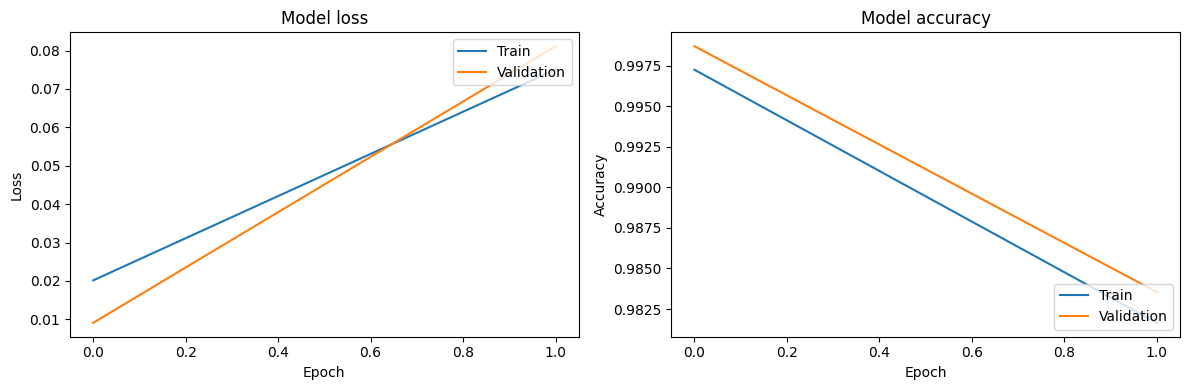

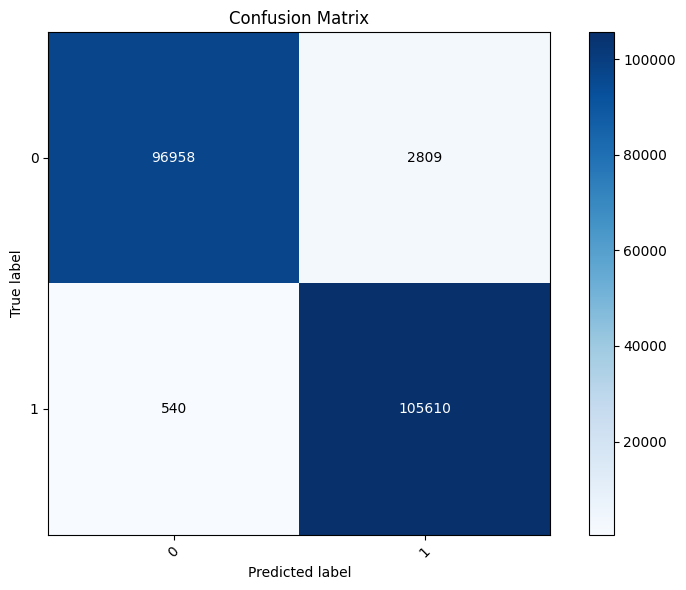

In [ ]:
# Plot loss curves
plot_loss(model_history_privacy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary_mlp_privacy)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

num_classes = conf_matrix.shape[0]

# Get class labels from the LabelEncoder
class_labels = [0,1]

plt.xticks(np.arange(num_classes), class_labels, rotation=45)
plt.yticks(np.arange(num_classes), class_labels)

thresh = conf_matrix.max() / 2.

# Add text annotations
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
# precision, recall, thresholds = precision_recall_curve(y_test_binary_true, y_test_pred_binary_mlp_privacy)
# area_under_curve = auc(recall, precision)

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label=f'Privacy Model Precision-Recall Curve (AUC = {area_under_curve:.2f})')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Privacy Model Precision-Recall Curve')
# plt.legend(loc='lower left')
# plt.show()

In [ ]:
# Extract trainable variables from the model
trainable_variables = student_model_privacy.trainable_variables

# Compute privacy budget
privacy_report = compute_dp_sgd_privacy.compute_dp_sgd_privacy_lib.compute_dp_sgd_privacy_statement(
    number_of_examples=len(X_train_scaled),
    batch_size=batch_size,
    noise_multiplier=noise_multiplier,
    num_epochs=30,
    delta=1e-5
)

In [ ]:
print(privacy_report)

DP-SGD performed over 1544371 examples with 16 examples per iteration, noise
multiplier 1.3 for 30 epochs with microbatching, and no bound on number of
examples per user.

This privacy guarantee protects the release of all model checkpoints in addition
to the final model.

Example-level DP with add-or-remove-one adjacency at delta = 1e-05 computed with
RDP accounting:
    Epsilon with each example occurring once per epoch:        74.229
    Epsilon assuming Poisson sampling (*):                      1.058

No user-level privacy guarantee is possible without a bound on the number of
examples per user.

(*) Poisson sampling is not usually done in training pipelines, but assuming
that the data was randomly shuffled, it is believed that the actual epsilon
should be closer to this value than the conservative assumption of an arbitrary
data order.



## Combine

In [ ]:
# Create DataFrame
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Regular': [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp],
    'Privacy': [accuracy_mlp_privacy, precision_mlp_privacy, recall_mlp_privacy, f1_mlp_privacy]
}

df = pd.DataFrame(data)

# Print DataFrame
display(df)

,Metric,Regular,Privacy
0,Accuracy,0.998567,0.983736
1,Precision,0.998526,0.984276
2,Recall,0.998610,0.983379
3,F1 Score,0.998566,0.983707


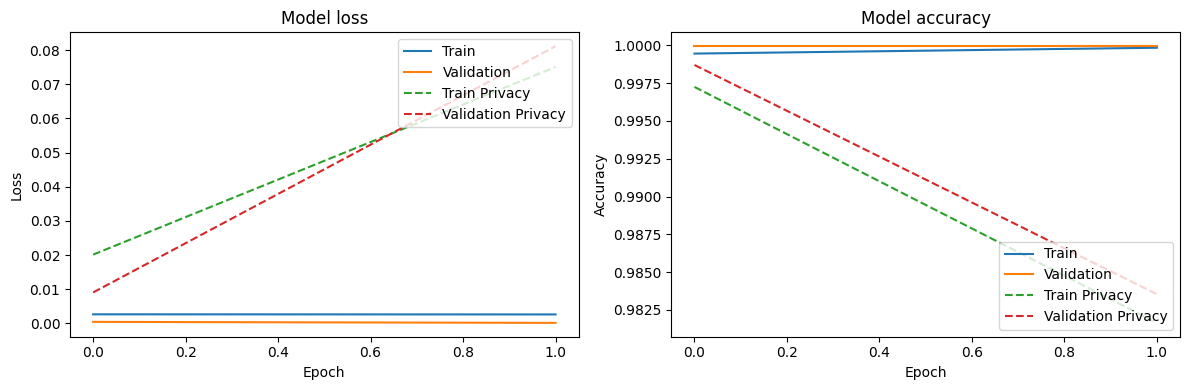

In [ ]:
plot_loss(model_history, model_history_privacy)